In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Transient Heat Conduction (Boundary Value Problem - BVP)

$\frac{∂T}{∂t}=k \nabla^2T$

$\frac{∂T}{∂t}(z,t)=k\frac{∂^2T}{∂z^2}(z,t)$ (1D)

At this point two questions arise:\
    1) How does the temperature change as time progresses?\
    2) How does the temperature change as we move along the rod?
    
Note that the way any one of these values changes depends on the other values.

We approximate the time derivative as:

$\frac{∂T}{∂t}|_{i,j} = \frac{T_{i,j+1}-T_{i,j}}{\Delta t}$

$\frac{∂^2T}{∂t^2}|_{i,j} = \frac{T_{i,j+1}-2T_{i,j}+T_{i,j-1}}{\Delta t^2}$


**Data**

Length of wall: L = 1 m\
Initial condition: T$_0$(z) = 150$^o$C\
Left boundary condition: T(0, t) = 100$^o$C\
Right boundary condition: T(L, t) = 200$^o$C

In [2]:
N = 100 # number of points to discretize

# spatial discretization
L = 1.0 # length of wall
z = np.linspace(0, L, N) # position along the rod
dz = L / (N - 1) # grid spacing

# temporal discretization
tfinal = 5.0
tspan = np.linspace(0.0, tfinal, N)

def pde_func(t, T, k):

    dTdt = np.zeros(z.shape)
    dTdt[0] = 0 # constant at boundary condition
    dTdt[-1] = 0 # constant at boundary condition

    # now for the internal nodes
    for i in range(1, N-1):
        
        dTdt[i] = k * (T[i + 1] - 2*T[i] + T[i - 1]) / dz**2
    
    return dTdt

# initial values
T_init = 150.0*np.ones(z.shape)

# boundary conditions (2)
T_init[0] = 100.0  # left boundary condition
T_init[-1] = 200.0 # right boundary condition

# arguments of pde
k = 0.02
args = (k,)

sol = solve_ivp(pde_func, (0, tspan[-1]), T_init, t_eval = tspan, args = args)

In [3]:
pd.DataFrame(sol.y.T)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,100.0,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,200.0
1,100.0,108.969881,117.255460,125.177889,131.380244,137.138915,140.871728,144.361442,146.138844,147.935915,...,152.064085,153.861156,155.638558,159.128272,162.861085,168.619756,174.822111,182.744540,191.030119,200.0
2,100.0,106.344305,112.431906,118.406384,123.673543,128.769287,132.868981,136.817273,139.678205,142.468790,...,157.531210,160.321795,163.182727,167.131019,171.230713,176.326457,181.593616,187.568094,193.655695,200.0
3,100.0,105.168059,110.238735,115.161868,119.811114,124.195600,128.178757,131.830651,135.018953,137.865135,...,162.134865,164.981047,168.169349,171.821243,175.804400,180.188886,184.838132,189.761265,194.831941,200.0
4,100.0,104.471721,108.902899,113.192286,117.367140,121.277144,125.018045,128.404249,131.593543,134.378853,...,165.621147,168.406457,171.595751,174.981955,178.722856,182.632860,186.807714,191.097101,195.528279,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,100.0,101.056747,102.109673,103.169500,104.217885,105.280047,106.323197,107.386955,108.424219,109.488850,...,190.511150,191.575781,192.613045,193.676803,194.719953,195.782115,196.830500,197.890327,198.943253,200.0
96,100.0,101.054320,102.107383,103.162253,104.213356,105.268072,106.316533,107.370407,108.415573,109.467942,...,190.532058,191.584427,192.629593,193.683467,194.731928,195.786644,196.837747,197.892617,198.945680,200.0
97,100.0,101.051960,102.105240,103.155202,104.209120,105.256420,106.310304,107.354303,108.407496,109.447591,...,190.552409,191.592504,192.645697,193.689696,194.743580,195.790880,196.844798,197.894760,198.948040,200.0
98,100.0,101.049719,102.103126,103.148507,104.204941,105.245359,106.304155,107.339018,108.399519,109.428278,...,190.571722,191.600481,192.660982,193.695845,194.754641,195.795059,196.851493,197.896874,198.950281,200.0


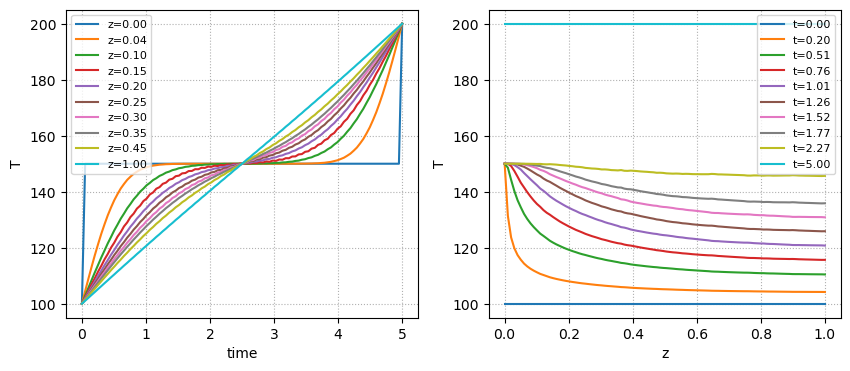

In [4]:
fig, ax = plt.subplots(ncols = 2, figsize = (10,4))

for j in [0, 4, 10, 15, 20, 25, 30, 35, 45, -1]:
    ax[0].plot(sol.t, sol.y[:, j], label='z={0:1.2f}'.format(z[j])) # ∂T/dt - all rows from each column
    ax[1].plot(z, sol.y[j, :], label='t={0:1.2f}'.format(tspan[j])) # ∂T/dz - all columns from each row


ax[0].set_xlabel("time")
ax[0].set_ylabel("T")
ax[0].legend(fontsize = 8)
ax[0].grid(linestyle = ":")

ax[1].set_xlabel("z")
ax[1].set_ylabel("T")
ax[1].legend(fontsize = 8)
ax[1].grid(linestyle = ":")

<Figure size 640x480 with 0 Axes>

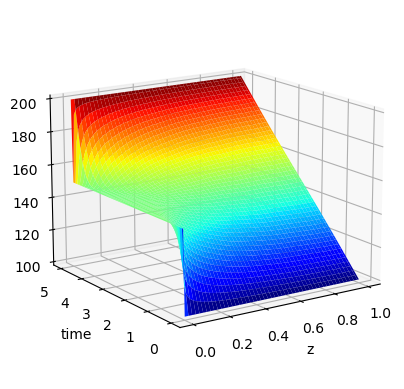

In [5]:
# adjust figure edges so the legend is in the figure
plt.subplots_adjust(top=0.89, right=0.77)

# Make a 3d figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(z, tspan)
ax.plot_surface(SX, ST, sol.y, cmap='jet')
ax.set_xlabel('z')
ax.set_ylabel('time')
ax.set_zlabel('T')
ax.view_init(elev=15, azim=-124) # adjust view so it is easy to see